# **Import Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv("Retailsales.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB
None
Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Disc

# **EDA**

In [11]:

print(df.describe())


         Product ID    Units Sold  Sales Revenue (USD)  Discount Percentage  \
count  3.000000e+04  30000.000000         30000.000000         30000.000000   
mean   4.461294e+07      6.161967          2749.509593             2.973833   
std    2.779759e+07      3.323929          2568.639288             5.974530   
min    3.636541e+06      0.000000             0.000000             0.000000   
25%    2.228600e+07      4.000000           882.592500             0.000000   
50%    4.002449e+07      6.000000          1902.420000             0.000000   
75%    6.559352e+07      8.000000          3863.920000             0.000000   
max    9.628253e+07     56.000000         27165.880000            20.000000   

       Marketing Spend (USD)  
count           30000.000000  
mean               49.944033  
std                64.401655  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%               100.000000  
max               199.000000  


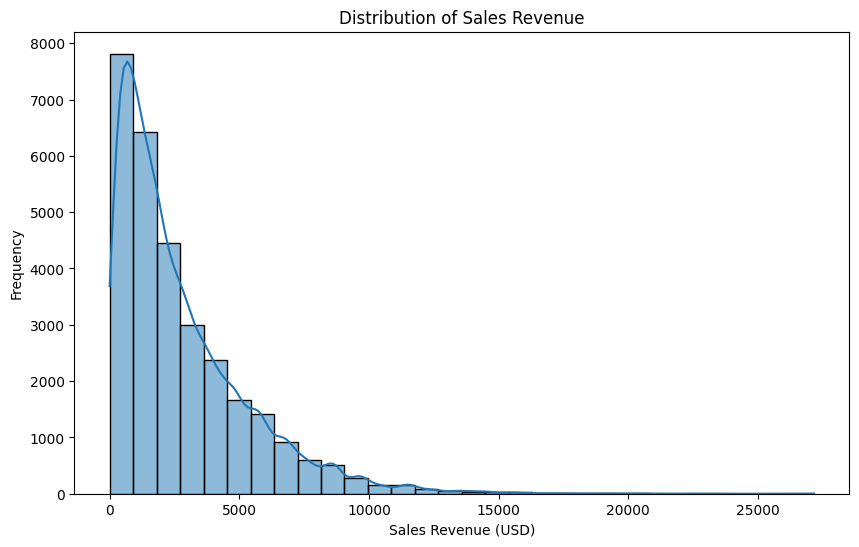

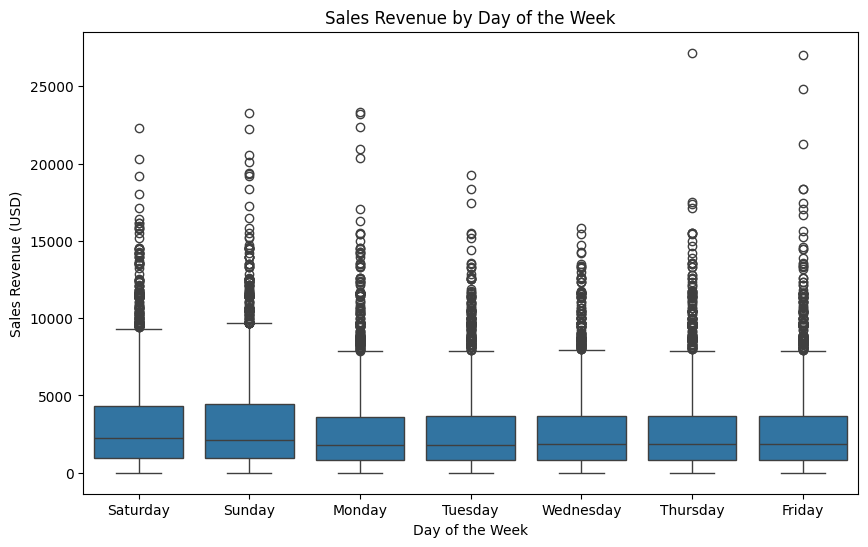

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales Revenue (USD)'], kde=True, bins=30)
plt.title('Distribution of Sales Revenue')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of the Week', y='Sales Revenue (USD)', data=df)
plt.title('Sales Revenue by Day of the Week')
plt.show()

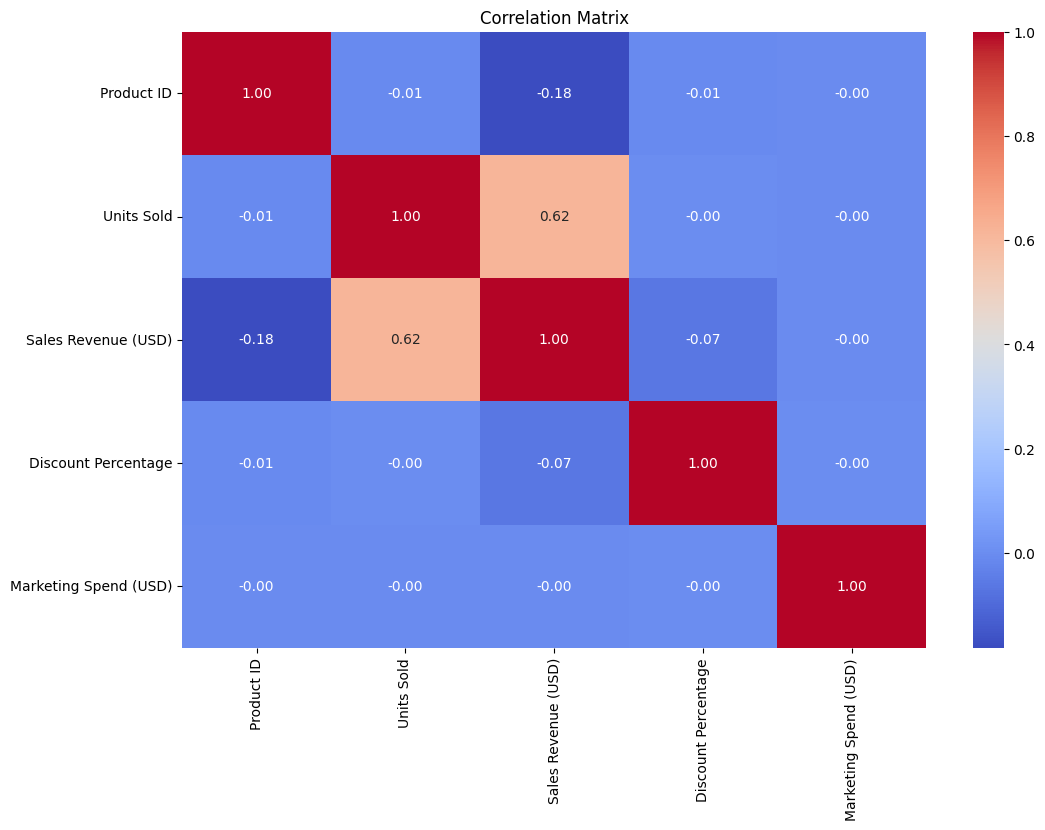

In [13]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [14]:
df['Date'] = pd.to_datetime(df['Date'])


In [15]:
df = pd.get_dummies(df, columns=['Store ID', 'Store Location', 'Product Category', 'Day of the Week'], drop_first=True)


In [16]:
X = df.drop(columns=['Sales Revenue (USD)', 'Date'])
y = df['Sales Revenue (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model**

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 22.12611015000219
Mean Squared Error (MSE): 41871.72987229039
Root Mean Squared Error (RMSE): 204.62582894710624
R-squared (R2): 0.9937602606643642


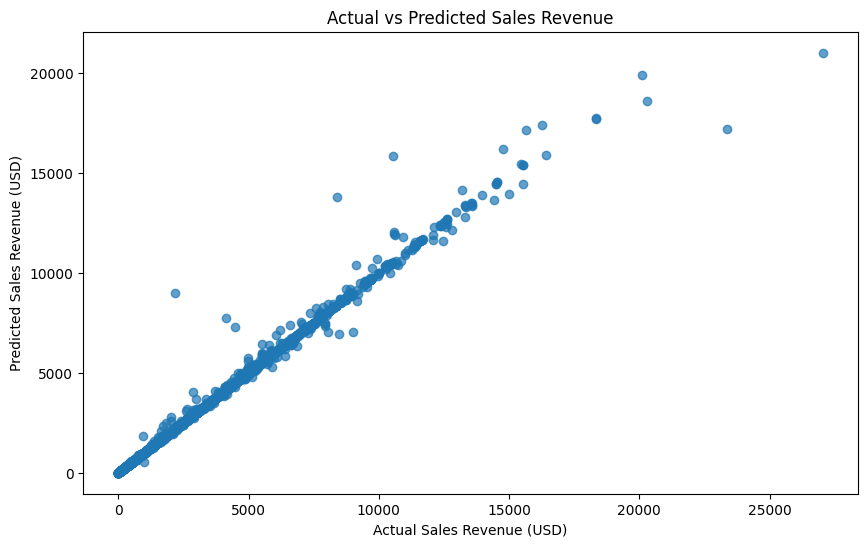

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Predicted Sales Revenue (USD)')
plt.title('Actual vs Predicted Sales Revenue')
plt.show()


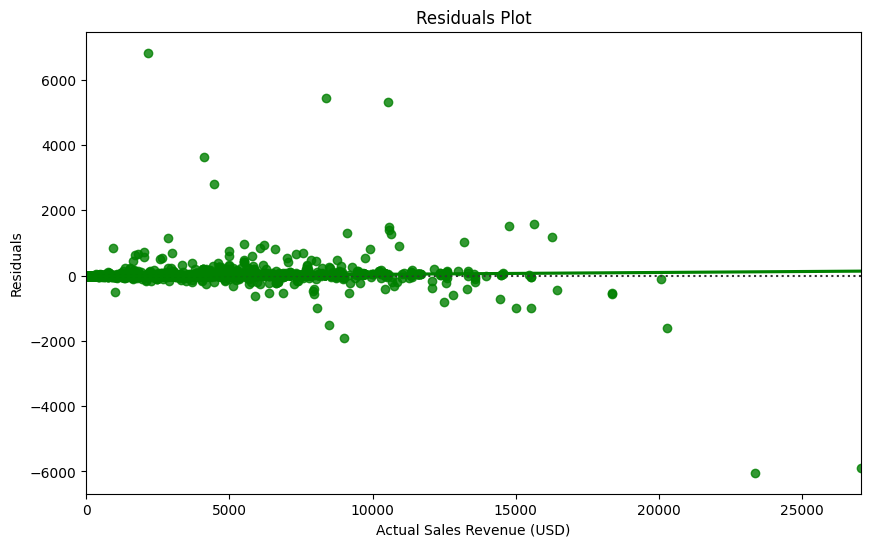

In [19]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
plt.xlabel('Actual Sales Revenue (USD)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
